## Performing medical imaging segmentation like a pro (Part 2)
*A highly oppiniated and biased tutorial on MRI lesion segmentation using Pytorch*

**Sergi Valverde, PhD**
*Universitat de Girona, Spain*



# The U-NET model:
---


Import all necessary libraries. During this tutorial, we make use of [ANTS](https://github.com/ANTsX/ANTsPy), which is like a super-power to manage and process `nifti` images. 


In [1]:
!pip install https://github.com/ANTsX/ANTsPy/releases/download/v0.2.0/antspyx-0.2.0-cp37-cp37m-linux_x86_64.whl
!pip install statsmodels
import torch
import ants

Download the MRI scans and move it to `data`:

In [ ]:
!mkdir data

In [ ]:
%%capture
!wget https://www.dropbox.com/s/cfhcbkxlu23nzi9/WMH2017_set.zip?dl=0 
!unzip WMH2017_set.zip\?dl\=0
!mv WMH2017 data/

Training data for a reduced set of the [MICCAI2017 WM Hyperintensity challenge](https://wmh.isi.uu.nl) is stored at `data/WMH2017` and split in two sets containing 20 training and 10 testing cases. Each case contains a `FLAIR` and a `T1`image, coregistered to the `FLAIR` space (3mm). Manual annotated masks for white matter intensities are also provided for each case. Let's see an image as example: 

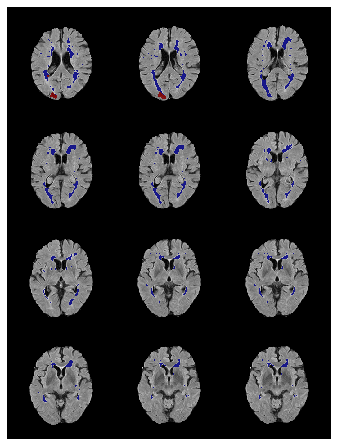

In [16]:
mri_subject = ants.image_read('data/WMH2017/train/41/FLAIR_brain.nii.gz')
lesion_mask = ants.image_read('data/WMH2017/train/41/wmh.nii.gz')
mri_subject.plot(overlay=lesion_mask, axis=2)